In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
insurance=pd.read_csv("new_insurance_data.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [4]:
#EDA- Exploratory Data Analysis

In [5]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [7]:
# Removal Of NaN values
"""
Integer/Float ---Replace null values with mean/median
object------- mode"""

'\nInteger/Float ---Replace null values with mean/median\nobject------- mode'

In [8]:
insurance["age"]=insurance["age"].fillna(insurance["age"].mean())

In [9]:
insurance.isnull().sum()


age                                 0
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [10]:
col_names=insurance.columns

In [11]:
col_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [12]:
for col in col_names:
    if insurance[col].dtype=="object":
        insurance[col]=insurance[col].fillna(insurance[col].mode())
    else:
        insurance[col]=insurance[col].fillna(insurance[col].mean())

In [13]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

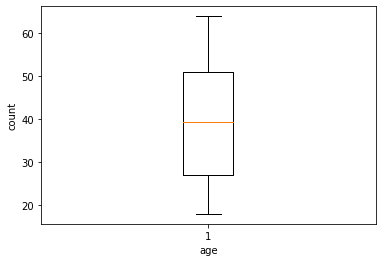

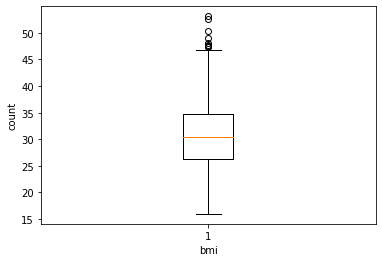

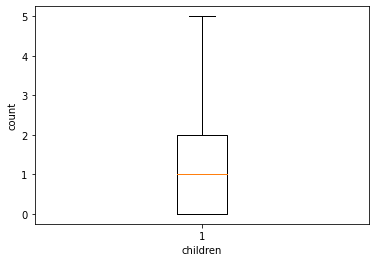

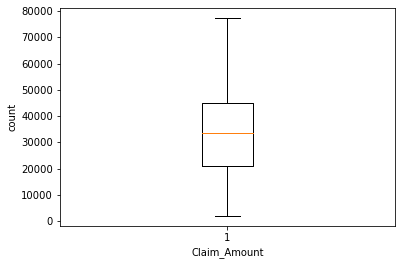

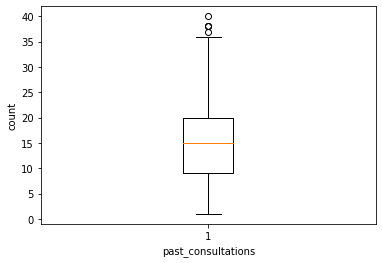

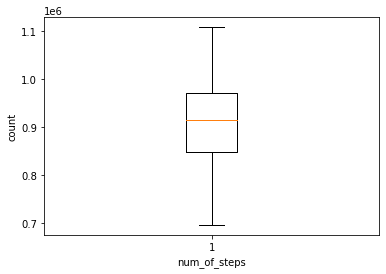

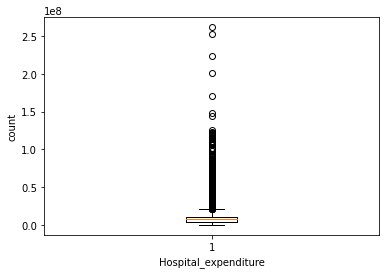

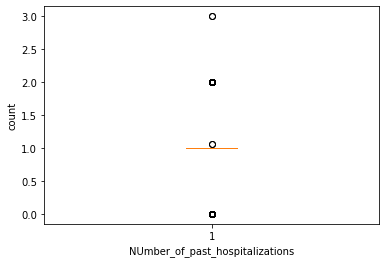

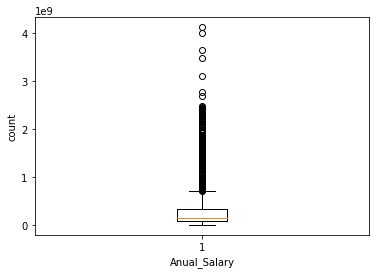

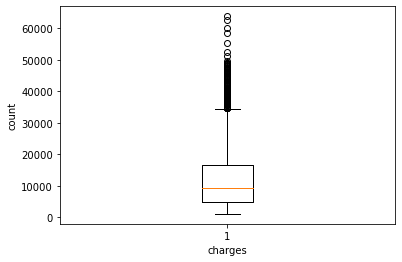

In [14]:
#visualizing the data
# finding the Outliers
for col in col_names:
    if insurance[col].dtype=="float64" or insurance[col].dtype=="int64":
        plt.boxplot(insurance[col])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

In [15]:
Q1=insurance["bmi"].quantile(0.25)
Q3=insurance["bmi"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [16]:
Q1

26.315

In [17]:
Q3

34.65625

In [18]:
insurance=insurance[(insurance["bmi"]>=lower_limit) & (insurance["bmi"]<=upper_limit)]

In [19]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,60.0,male,32.800,0.0,yes,77277.98848,40.0,1095960.0,1.480346e+08,2.0,2.780642e+09,southwest,52590.82939
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897


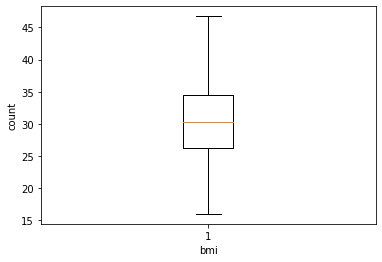

In [20]:
plt.boxplot(insurance["bmi"])
plt.xlabel("bmi")
plt.ylabel("count")
plt.show()

In [21]:
Q1 = insurance.past_consultations.quantile(0.25)
Q3 = insurance.past_consultations.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.past_consultations >= Q1 - 1.5*IQR) & (insurance.past_consultations <= Q3 + 1.5*IQR)]

Q1 = insurance.Hospital_expenditure.quantile(0.25)
Q3 = insurance.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Hospital_expenditure >= Q1 - 1.5*IQR) & (insurance.Hospital_expenditure <= Q3 + 1.5*IQR)]

Q1 = insurance.Anual_Salary.quantile(0.25)
Q3 = insurance.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Anual_Salary >= Q1 - 1.5*IQR) & (insurance.Anual_Salary <= Q3 + 1.5*IQR)]


In [22]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


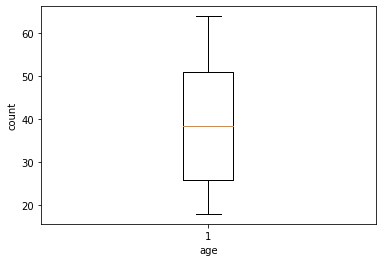

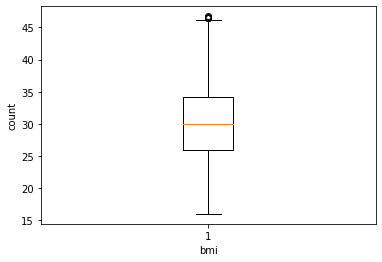

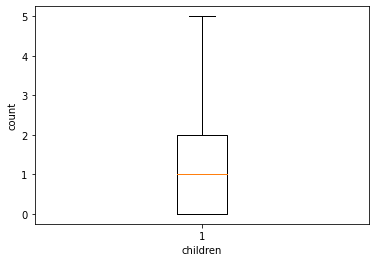

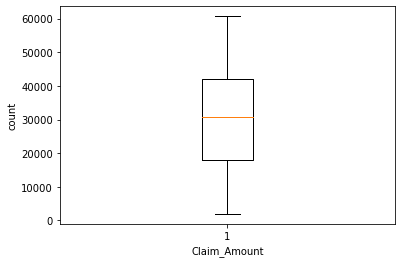

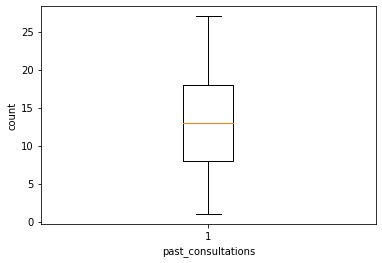

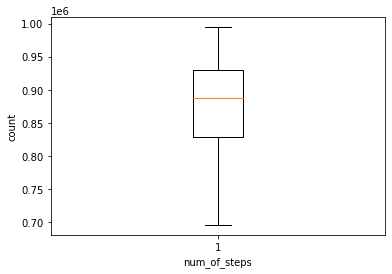

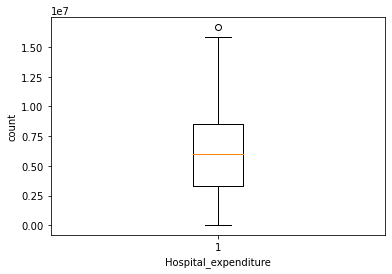

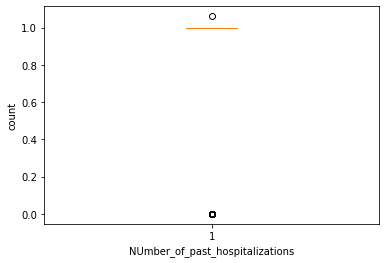

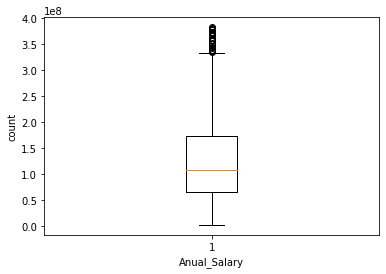

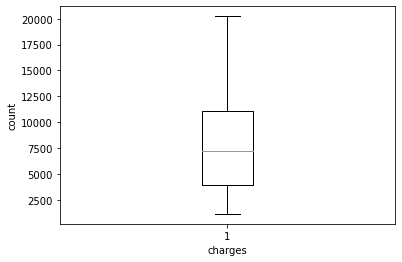

In [23]:
for col in col_names:
    if insurance[col].dtype=="float64" or insurance[col].dtype=="int64":
        plt.boxplot(insurance[col])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

In [24]:
# Feature Selection ond scaling 
Corelation Factor
VIF-variance inflation factor

SyntaxError: invalid syntax (2852022219.py, line 2)

In [25]:
insurance.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840,0.138470
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.138470,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
col_list=[]
for col in col_names:
    if insurance[col].dtype!="object" and col!="charges":
        col_list.append(col)
        

In [28]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [29]:
X=insurance[col_list]

In [30]:
vif_data=pd.DataFrame()

In [31]:
vif_data["Column names"]=X.columns

In [32]:
vif_data["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [33]:
vif_data

,Column names,VIF values
0,age,15.452095
1,bmi,26.330788
2,children,2.029618
3,Claim_Amount,5.678660
4,past_consultations,6.258017
5,num_of_steps,61.574692
6,Hospital_expenditure,5.204376
7,NUmber_of_past_hospitalizations,12.052060
8,Anual_Salary,5.481823


In [34]:
insurance=insurance.drop('num_of_steps',axis=1)

In [35]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


In [36]:
col_list=[]
for col in insurance.columns:
    if insurance[col].dtype!="object" and col!="charges":
        col_list.append(col)
X=insurance[col_list]
vif_data=pd.DataFrame()
vif_data["Column names"]=X.columns

vif_data["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Column names,VIF values
0,age,14.484893
1,bmi,12.261123
2,children,2.017441
3,Claim_Amount,5.243640
4,past_consultations,5.842169
5,Hospital_expenditure,4.929952
6,NUmber_of_past_hospitalizations,10.687768
7,Anual_Salary,5.380679


In [37]:
insurance=insurance.drop('age',axis=1)

In [38]:
col_list=[]
for col in insurance.columns:
    if insurance[col].dtype!="object" and col!="charges":
        col_list.append(col)
X=insurance[col_list]
vif_data=pd.DataFrame()
vif_data["Column names"]=X.columns
vif_data["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Column names,VIF values
0,bmi,10.323093
1,children,1.978843
2,Claim_Amount,5.228284
3,past_consultations,5.821933
4,Hospital_expenditure,4.929287
5,NUmber_of_past_hospitalizations,8.310570
6,Anual_Salary,4.723495


In [39]:
insurance=insurance.drop('bmi',axis=1)
#since it is execute once that why when i executed it agian it through an error

In [40]:
col_list=[]
for col in insurance.columns:
    if insurance[col].dtype!="object" and col!="charges":
        col_list.append(col)
X=insurance[col_list]
vif_data=pd.DataFrame()
vif_data["Column names"]=X.columns
vif_data["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Column names,VIF values
0,children,1.977037
1,Claim_Amount,4.547332
2,past_consultations,5.049165
3,Hospital_expenditure,4.492630
4,NUmber_of_past_hospitalizations,7.245972
5,Anual_Salary,4.688833


In [41]:
insurance=insurance.drop('NUmber_of_past_hospitalizations',axis=1)

In [42]:
col_list=[]
for col in insurance.columns:
    if insurance[col].dtype!="object" and col!="charges":
        col_list.append(col)
X=insurance[col_list]
vif_data=pd.DataFrame()
vif_data["Column names"]=X.columns
vif_data["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,Column names,VIF values
0,children,1.713101
1,Claim_Amount,4.152224
2,past_consultations,4.670212
3,Hospital_expenditure,4.320876
4,Anual_Salary,4.279483


In [43]:
# Independent and Dependent data
x=insurance.loc[:,["children","Claim_Amount","past_consultations","Hospital_expenditure","Anual_Salary"]]


In [44]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,3.696849e+08


In [45]:
y=insurance.iloc[:,-1]

In [46]:
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1030, dtype: float64

In [47]:
# Train Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=0.3)

In [48]:
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
969,0.0,24827.43078,8.0,1.214312e+07,2.928227e+08
150,0.0,41589.95664,20.0,3.126146e+06,2.276322e+07
512,1.0,41827.76441,21.0,3.210070e+06,1.200297e+08
159,1.0,33699.89171,16.0,8.864018e+06,7.050630e+07
280,1.0,23282.86667,9.0,1.774925e+06,8.265115e+07
...,...,...,...,...,...
1029,0.0,51178.09811,20.0,8.528747e+06,3.504584e+08
235,0.0,18767.94647,15.0,2.247799e+06,2.946028e+07
657,5.0,10176.26227,8.0,7.225558e+06,9.606326e+07
401,1.0,21406.64866,12.0,3.036738e+06,3.303909e+07


In [49]:
y_train

969     14449.85440
150      2498.41440
512      7152.67140
159      2639.04290
280      4151.02870
           ...     
1029    18246.49550
235      3558.62025
657      9222.40260
401      5484.46730
486      6753.03800
Name: charges, Length: 721, dtype: float64

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
li_model=LinearRegression()

In [52]:
li_model

LinearRegression()

In [53]:
# Fitting of Training data
li_model.fit(x_train,y_train)

LinearRegression()

In [54]:
# Prediction 

pred_y=li_model.predict(x_test)

In [55]:
pred_y

array([ 9192.76356201,  7958.75960493,  8033.96011965,  2810.3850915 ,
        9027.0144242 ,  8236.96614444,  7680.19165442,  6789.61414066,
        3588.40913792,  1972.84852718,  6420.8565884 ,  2768.43501767,
        8686.56609183, 17074.15904971,  7352.97064427, 15146.77287481,
        6956.37632145, 18646.45997506, 10235.66663533,  6504.11218123,
        6754.26162695,  4345.03720524, 10422.89961042,  3761.10515555,
        2755.35029334,  7232.49564568,  7361.8805728 ,  6273.43149023,
        5466.20429462,  6082.29398875,  6901.51316254, 16450.75238109,
       11356.86773335, 10247.27301319,  7473.13881881,  3027.17834319,
        1948.56571087,  5478.93095694,  7867.48881012, 10612.83721589,
        4519.10706418,  4732.09887722,  5552.66322684,  2420.80635145,
        2586.0765823 ,  5951.44415976,  5303.82766607,  5865.22904259,
        9439.57025781,  5553.14261525,  5642.79409063, 14128.73330201,
       10062.97064088,  5448.87645119, 11788.56971962,  8248.47756853,
      

In [56]:
y_test

683     9583.89330
383     5325.65100
485     6748.59120
104     2134.90150
643     8964.06055
          ...     
993    16085.12750
174     2755.02095
467     6500.23590
614     8551.34700
661     9282.48060
Name: charges, Length: 309, dtype: float64

In [57]:
from sklearn.metrics import mean_absolute_percentage_error

In [58]:
mape=mean_absolute_percentage_error(pred_y,y_test)

In [59]:
print(mape)

0.24312691945943496


In [60]:
that means that the accuracy is (100-0.243126)% is the accuracy

SyntaxError: invalid syntax (966145817.py, line 1)